In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Cargar y normalizar el conjunto de datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas en one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step


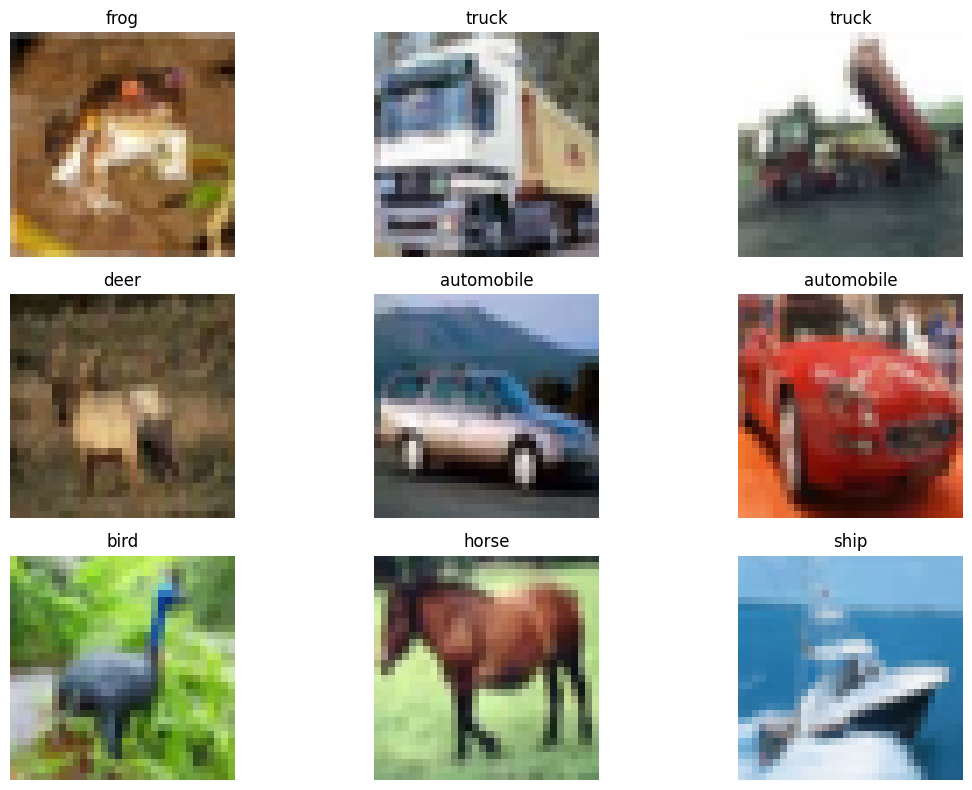

In [2]:
# Función para visualizar imágenes de muestra y sus etiquetas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(x, y):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.clip(x[i], 0, 1))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar imágenes de muestra y sus etiquetas
plot_sample_images(x_train, y_train)

# Crea los generadores de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)

In [3]:
# Crea los generadores de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)

In [4]:
# Define tu modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [6]:
# Compila y entrena el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 44s 79ms/step - loss: 1.8519 - accuracy: 0.3696 - val_loss: 2.3241 - val_accuracy: 0.2628
Epoch 2/10
391/391 [==============================] - 32s 81ms/step - loss: 1.3715 - accuracy: 0.5067 - val_loss: 1.2216 - val_accuracy: 0.5803
Epoch 3/10
391/391 [==============================] - 30s 78ms/step - loss: 1.1976 - accuracy: 0.5748 - val_loss: 1.3451 - val_accuracy: 0.5576
Epoch 4/10
391/391 [==============================] - 30s 78ms/step - loss: 1.1049 - accuracy: 0.6104 - val_loss: 0.9892 - val_accuracy: 0.6553
Epoch 5/10
391/391 [==============================] - 29s 75ms/step - loss: 1.0388 - accuracy: 0.6356 - val_loss: 1.0805 - val_accuracy: 0.6298
Epoch 6/10
391/391 [==============================] - 30s 78ms/step - loss: 1.0057 - accuracy: 0.6492 - val_loss: 1.0765 - val_accuracy: 0.6488
Epoch 7/10
391/391 [==============================] - 30s 76ms/step - loss: 0.9686 - accuracy: 0.6651 - val_loss: 0.9593 - val_accuracy:

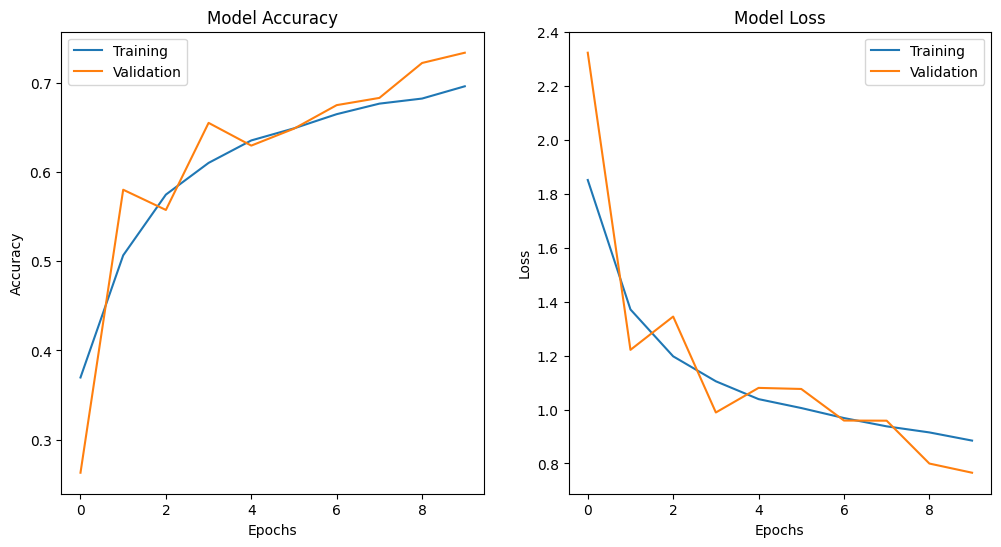

In [7]:
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
model.save('conv.h5')